# 워드클라우드 그리기
- tokenize하기
- 형태소 분석하기(KoNLPy내에 있는 Komoran, Twitter 외에 다른 클래스들도 사용해보기, 가능하면 SoyNLP도)
- 미등록단어 처리하기(+ 사용자 추가)
- 명사만 추출
- 불용어 처리하기(+ 사용자 추가)

In [1]:
import pandas as pd

In [169]:
# CSV 데이터 불러오기
df = pd.read_csv("../../data/naver_blog_clova.csv", index_col=0)

In [170]:
# 데이터 확인
df.head()

,title,publish_datetime,text,url
0,애기들이 좋아하는 ai스피커 네이버클로바,2019-03-20 23:01:00,애기들이 좋아하는 ai스피커 네이버클로바\n작년부터 tv에 #인공지능 스피커가 \n...,https://blog.naver.com/sky121400?Redirect=Log&...
1,네이버 클로바 스피커 1년 사용 후기,2019-03-31 19:35:00,네이버 클로바 스피커 1년 사용 후기\n네이버 클로바 1년 사용 후기를 몇 자 적어...,https://blog.naver.com/danjuck?Redirect=Log&lo...
2,네이버 클로바 사용법 맘스다이어리와 함께 육아정보를,2018-12-14 12:10:00,어제는 눈이 갑자기 많이 내려서 1주일에 한번 가는 문센을 가야하나 말아야하나고민이...,https://blog.naver.com/ralrapo?Redirect=Log&lo...
3,네이버 클로바. 나의 두 번째 Ai 스피커,2018-12-02 14:04:00,안녕하세요. 제르디난 입니다.\n올해 초 카카오 미니를 사용해보고 약간의 실망스러움...,https://blog.naver.com/yarosiku?Redirect=Log&l...
4,네이버 클로바 스피커 브라운 미니언 : 오히려 부모님 선물로 추천드려요!,2018-09-09 18:18:00,네이버 클로바 스피커 브라운 미니언 : 오히려 부모님 선물로 추천드려요!\n요새 정...,https://blog.naver.com/ukb0914?Redirect=Log&lo...


In [171]:
# 블로그 본문 확인
df.text[:5]

0    애기들이 좋아하는 ai스피커 네이버클로바\n작년부터 tv에 #인공지능 스피커가 \n...
1    네이버 클로바 스피커 1년 사용 후기\n네이버 클로바 1년 사용 후기를 몇 자 적어...
2    어제는 눈이 갑자기 많이 내려서 1주일에 한번 가는 문센을 가야하나 말아야하나고민이...
3    안녕하세요. 제르디난 입니다.\n올해 초 카카오 미니를 사용해보고 약간의 실망스러움...
4    네이버 클로바 스피커 브라운 미니언 : 오히려 부모님 선물로 추천드려요!\n요새 정...
Name: text, dtype: object

In [172]:
# 블로그 본문 컬럼이 Not null인 총 개수 확인
len(df[df.text.notnull()])

1052

In [173]:
# 블로그 본문 컬럼이 Not null인 row를 제외하기
df = df[df.text.notnull()].copy()

In [174]:
# 블로그 본문에 있는 개행문자(\n, \r)를 제거
df.text = df.text.map(lambda x:x.replace("\n", " ").replace("\r", " "))

<br/><br/>

### Tokenize 하기
- [의문] 우리는 어차피 명사만 뽑아낼건데 문장별로 구분할 필요가 있을까?
- [의문] 어치피 형태소 분석을 하게 되면 자동으로 tokenize 되는 것 같은데..
- [의문] 이건 따로 문장별, 단어별 처리를 하고싶을 때 사용해야하지 않을까?

#### 1. 문장 단위로 tokenize

In [65]:
import nltk.tokenize

In [67]:
sentences = list(map(nltk.tokenize.sent_tokenize, df.text))
sentences[:5]

[['애기들이 좋아하는 ai스피커 네이버클로바 작년부터 tv에 #인공지능 스피커가  엄청나게 출현했지만  나는 아직 시기상조라고 생각했다.',
  '애플의 siri나 구글을 봐도 좋은 기능이기는하지만 잘 안써지기에 #인공지는스피커 라고 해서 뭐 다를까?했다.',
  '그러던 어느날 친한 형이  #네이버클로바 를 샀는데 생각보다는 말을 잘 알아듣고 무엇보다 애들이 엄청 좋아했다면서  구매를 권유했다.',
  '애들이 좋아했다는 말에 귀가 솔깃!!!',
  '집에와서 #ai스피커 를 폭풍검색 아마존의 알렉사는 이미 해외에서는 유명했고 우리나라는 통신3사의 스피커 sk의 nugu, kt의 기가지니, lg는 뭐지?하고 구글의 구글홈, 네이버의 #클로바 가 경쟁하고 있었다.',
  '만사가 귀찮으신분은 그냥 통신 3사의 스피커로 iot를 구축하고  조금 고민이 많으신분은  구글홈으로 많이 가는 것 같다.',
  '그 중 네이버클로바는 통신3사 처럼 강제(?',
  ')로 iot를 구축할 수 는 없고 #구글홈 처럼 확장성이 뛰어난 것은 아닌 것 같지만 우리나라에 최적화되어 있다는 것과 #캐릭터 모양이 큰 장점이다.',
  '미니언즈도있고 샐리와 브라운이라는 이름의 스피커도 존재한다.',
  '그리고 소형의 미니도 있고 스피커 및 배터리가 향상된 롱타입도 존재 sk #nugu  vs  네이버 클로바 처음에는 클로바를 구매하려다가 그래도 ai스피커인데 집에서 활용을 좀 해야지 하는 생각에 sk #nugu캔들 을 검색해봤다.',
  '(집 iptv가 sk라서 nugu를 사용해야  tv를 제어할 수 있다.)',
  '와이프는 캔들이 더 이뿌고 활용도가 높을 것  같다고했지만 원래 목적이 애들을 위한 것이고 그리고 큰 차이는 클로바는 내장형 배터리가 있는데 누구는 배터리가 없다는...  즉, 클로바는 휴대가능하고 누구는 고정해놓고 사용해야(전기가 꽂혀있어야하는)하는 단점에 클로바로 구입하기로 결정!',
  '(써보고  좋으면 누구도 구입하자고하고...) 애들에게 어떤 모델이 좋냐

#### 1-2. 문장단위로 tokenize한 것을 단어 단위로 tokenize

In [69]:
words = [list(map(nltk.tokenize.word_tokenize, sentence)) for sentence in sentences]
words[:5]

[[['애기들이',
   '좋아하는',
   'ai스피커',
   '네이버클로바',
   '작년부터',
   'tv에',
   '#',
   '인공지능',
   '스피커가',
   '엄청나게',
   '출현했지만',
   '나는',
   '아직',
   '시기상조라고',
   '생각했다',
   '.'],
  ['애플의',
   'siri나',
   '구글을',
   '봐도',
   '좋은',
   '기능이기는하지만',
   '잘',
   '안써지기에',
   '#',
   '인공지는스피커',
   '라고',
   '해서',
   '뭐',
   '다를까',
   '?',
   '했다',
   '.'],
  ['그러던',
   '어느날',
   '친한',
   '형이',
   '#',
   '네이버클로바',
   '를',
   '샀는데',
   '생각보다는',
   '말을',
   '잘',
   '알아듣고',
   '무엇보다',
   '애들이',
   '엄청',
   '좋아했다면서',
   '구매를',
   '권유했다',
   '.'],
  ['애들이', '좋아했다는', '말에', '귀가', '솔깃', '!', '!', '!'],
  ['집에와서',
   '#',
   'ai스피커',
   '를',
   '폭풍검색',
   '아마존의',
   '알렉사는',
   '이미',
   '해외에서는',
   '유명했고',
   '우리나라는',
   '통신3사의',
   '스피커',
   'sk의',
   'nugu',
   ',',
   'kt의',
   '기가지니',
   ',',
   'lg는',
   '뭐지',
   '?',
   '하고',
   '구글의',
   '구글홈',
   ',',
   '네이버의',
   '#',
   '클로바',
   '가',
   '경쟁하고',
   '있었다',
   '.'],
  ['만사가',
   '귀찮으신분은',
   '그냥',
   '통신',
   '3사의',
   '스피커로',
   'iot를',
   '구축하고',
   '조

#### 2.  단어 단위로 tokenize

In [79]:
words = list(map(nltk.tokenize.word_tokenize, df.text))
words[:5]

[['애기들이',
  '좋아하는',
  'ai스피커',
  '네이버클로바',
  '작년부터',
  'tv에',
  '#',
  '인공지능',
  '스피커가',
  '엄청나게',
  '출현했지만',
  '나는',
  '아직',
  '시기상조라고',
  '생각했다',
  '.',
  '애플의',
  'siri나',
  '구글을',
  '봐도',
  '좋은',
  '기능이기는하지만',
  '잘',
  '안써지기에',
  '#',
  '인공지는스피커',
  '라고',
  '해서',
  '뭐',
  '다를까',
  '?',
  '했다',
  '.',
  '그러던',
  '어느날',
  '친한',
  '형이',
  '#',
  '네이버클로바',
  '를',
  '샀는데',
  '생각보다는',
  '말을',
  '잘',
  '알아듣고',
  '무엇보다',
  '애들이',
  '엄청',
  '좋아했다면서',
  '구매를',
  '권유했다',
  '.',
  '애들이',
  '좋아했다는',
  '말에',
  '귀가',
  '솔깃',
  '!',
  '!',
  '!',
  '집에와서',
  '#',
  'ai스피커',
  '를',
  '폭풍검색',
  '아마존의',
  '알렉사는',
  '이미',
  '해외에서는',
  '유명했고',
  '우리나라는',
  '통신3사의',
  '스피커',
  'sk의',
  'nugu',
  ',',
  'kt의',
  '기가지니',
  ',',
  'lg는',
  '뭐지',
  '?',
  '하고',
  '구글의',
  '구글홈',
  ',',
  '네이버의',
  '#',
  '클로바',
  '가',
  '경쟁하고',
  '있었다',
  '.',
  '만사가',
  '귀찮으신분은',
  '그냥',
  '통신',
  '3사의',
  '스피커로',
  'iot를',
  '구축하고',
  '조금',
  '고민이',
  '많으신분은',
  '구글홈으로',
  '많이',
  '가는',
  '것',
  '같다',
  '.',
  '그',
  '중',

<br/><br/>
### POS tagging하기

#### 1.  Komoran 사용

In [81]:
from konlpy.tag import Komoran

In [129]:
komoran = Komoran(userdic='./komoran_unregistered.txt')

In [130]:
pos_tagging_list = list(map(komoran.pos, df.text))

In [131]:
import re

# 명사와 외래어만 뽑아내기위한 정규표현식
p = re.compile('NN.*|SL')

In [132]:
docs = []
for doc in pos_tagging_list:
    want_words = []
    for word, pos in doc:
        if p.match(pos):
            want_words.append(word)
    docs.append(want_words)

In [133]:
docs[:2]

[['애기',
  'ai',
  '스피커',
  '네이버',
  '클로바',
  '작년',
  'tv',
  '인공지능',
  '스피커',
  '출현',
  '시기상조',
  '생각',
  '애플',
  'siri',
  '구글',
  '기능',
  '인공',
  '스피커',
  '라고',
  '어느날',
  '형',
  '네이버',
  '클로바',
  '생각',
  '말',
  '애',
  '구매',
  '권유',
  '애',
  '말',
  '귀',
  '!!',
  '집',
  'ai',
  '스피커',
  '폭풍',
  '검색',
  '아마존',
  '알렉사',
  '해외',
  '우리나라',
  '통신',
  '스피커',
  'sk',
  'nugu',
  'kt',
  '기가',
  '지니',
  'lg',
  '구글',
  '구글',
  '홈',
  '네이버',
  '클로바',
  '경쟁',
  '만사',
  '분',
  '통신',
  '스피커',
  'iot',
  '구축',
  '고민',
  '분',
  '구글',
  '홈',
  '것',
  '중',
  '네이버',
  '클로바',
  '통신',
  '강제',
  'iot',
  '구축',
  '수',
  '구글',
  '홈',
  '확장',
  '것',
  '것',
  '우리나라',
  '최적화',
  '것',
  '캐릭터',
  '모양',
  '장점',
  '미니언즈',
  '샐리',
  '브라운',
  '이름',
  '스피커',
  '존재',
  '소형',
  '미니',
  '스피커',
  '배터리',
  '향상',
  '존재',
  'sk',
  'nugu',
  'vs',
  '네이버',
  '클로바',
  '처음',
  '클로바',
  '구매',
  'ai',
  '스피커',
  '집',
  '활용',
  '생각',
  'sk',
  'nugu',
  '캔들',
  '을',
  '검색',
  '집',
  'iptv',
  'sk',
  'nugu',
  '사용',
  'tv',
  

#### 2. Twitter (-> Okt로 변경됨) 사용
- 사용자 사전 추가가 지원 안되는듯..

In [157]:
from konlpy.tag import Okt

In [195]:
twitter = Okt()

In [196]:
pos_tagging_list = list(map(twitter.pos, df.text))

In [197]:
import re

# 명사와 외래어만 뽑아내기위한 정규표현식
p = re.compile('Noun|Alpha')

docs = []
for doc in pos_tagging_list:
    want_words = []
    for word, pos in doc:
        if p.match(pos):
            want_words.append(word)
    docs.append(want_words)

In [198]:
docs[:2]

[['애기',
  'ai',
  '스피커',
  '버클',
  '바',
  '작년',
  'tv',
  '스피커',
  '출현',
  '나',
  '시기상조',
  '생각',
  '애플',
  'siri',
  '나',
  '구글',
  '기능',
  '뭐',
  '날',
  '형',
  '를',
  '생각',
  '말',
  '무엇',
  '애',
  '구매',
  '권유',
  '애',
  '말',
  '귀가',
  '솔깃',
  '집',
  '를',
  '폭풍',
  '검색',
  '아마존',
  '알렉사',
  '해외',
  '우리나라',
  '통신',
  '사의',
  '스피커',
  'sk',
  '의',
  'nugu',
  'kt',
  '의',
  '가지',
  'lg',
  '뭐',
  '구글',
  '구글',
  '홈',
  '네이버',
  '경쟁',
  '만사',
  '신분',
  '그냥',
  '통신',
  '사의',
  '스피커',
  'iot',
  '를',
  '구축',
  '조금',
  '고민',
  '신분',
  '구글',
  '홈',
  '것',
  '그',
  '중',
  '버클',
  '바',
  '통신',
  '사',
  '처럼',
  '강제',
  '로',
  'iot',
  '를',
  '구축',
  '수',
  '처럼',
  '확장',
  '것',
  '것',
  '우리나라',
  '최적화',
  '것',
  '모양',
  '장점',
  '미니',
  '도',
  '리',
  '브라운',
  '이름',
  '스피커',
  '존재',
  '소형',
  '미니',
  '스피커',
  '및',
  '배터리',
  '향상',
  '롱',
  '타입',
  '존재',
  'sk',
  'vs',
  '네이버',
  '바',
  '처음',
  '구매',
  'ai',
  '스피커',
  '집',
  '활용',
  '좀',
  '생각',
  'sk',
  '검색',
  '집',
  'iptv',
  'sk',
  '라서',
  

#### 3. Hannanum 사용
- 미등록 단어 추가는 https://datascienceschool.net/view-notebook/4bfa8007982d4c7ba35d8b42cecd38c9/ 참고

In [199]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [200]:
pos_tagging_list = list(map(hannanum.pos, df.text))

In [202]:
import re

# 명사와 외래어만 뽑아내기위한 정규표현식
p = re.compile('N|F')

docs = []
for doc in pos_tagging_list:
    want_words = []
    for word, pos in doc:
        if p.match(pos):
            want_words.append(word)
    docs.append(want_words)

#### 4. Kkma 사용
- 미등록 단어 추가는 https://datascienceschool.net/view-notebook/4bfa8007982d4c7ba35d8b42cecd38c9/ 참고
- 너무 오래걸려서... 일단은 취소

In [214]:
from konlpy.tag import Kkma
kkma = Kkma()

In [216]:
pos_tagging_list = list(map(kkma.pos, df.text))

KeyboardInterrupt: 

In [ ]:
pos_tagging_list[:2]

In [ ]:
import re

# 명사와 외래어만 뽑아내기위한 정규표현식
p = re.compile('N|F')

docs = []
for doc in pos_tagging_list:
    want_words = []
    for word, pos in doc:
        if p.match(pos):
            want_words.append(word)
    docs.append(want_words)

<br/><br/>
### stopword 제거

In [203]:
stopwords = [line.strip() for line in open('./stopwordsKor.txt', encoding='utf-8')]

In [204]:
final_docs = []
for doc in docs:
    unique_NN_words = set(doc)
    final_NN_words = doc
    
    for word in unique_NN_words:
        if word in stopwords:
            while word in final_NN_words: final_NN_words.remove(word)
    final_docs.append(final_NN_words)

In [205]:
final_docs[:2]

[['애기들',
  'ai',
  '스피커',
  '네이버클로바',
  '작년',
  'tv',
  '#인공지능',
  '스피커',
  '출현',
  '시기상조',
  '애플',
  'siri',
  '구글',
  '기능이기는하',
  '안써지',
  '#인공지는스피커',
  '라',
  '뭐',
  '어느날',
  '#네이버클로바',
  '를',
  '무엇',
  '애',
  '구매',
  '권유',
  '애',
  '귀',
  '솔깃',
  '집에와서',
  '#ai스피커',
  '를',
  '폭풍검색',
  '아마존',
  '알렉사',
  '해외',
  '유명',
  '우리나라',
  '통신3사',
  '스피커',
  'sk',
  'nugu',
  'kt',
  '기가지니,',
  'lg',
  '뭐',
  '구글',
  '구글홈,',
  '네이버',
  '#클로바',
  '경쟁',
  '만사',
  '통신',
  '3사',
  '스피커',
  'iot',
  '구축',
  '고민',
  '구글홈',
  '네이버클로바',
  '통신3사',
  '처럼',
  '강제(',
  'iot',
  '구축',
  '#구글홈',
  '처럼',
  '확장성',
  '우리나라',
  '최적화',
  '#캐릭터',
  '모양',
  '장점',
  '미니언즈도있고',
  '리',
  '브라운',
  '이름',
  '스피커',
  '존재',
  '소형',
  '스피커',
  '배터리',
  '향상',
  '롱타입',
  '존재',
  'sk',
  '#nugu',
  'vs',
  '네이버',
  '클로바',
  '처음',
  '클로바',
  '구매',
  'ai',
  '스피커',
  '활용',
  'sk',
  '#nugu캔들',
  '검색',
  'iptv',
  'sk',
  'nugu',
  '사용',
  'tv',
  '제',
  '와이프',
  '이뿌',
  '활용도',
  '목적',
  '애',
  '클로바',
  '내장형',
  '배터리',
  '누구',
 

<br/><br/>
### Word Counting 

In [185]:
from collections import Counter

In [206]:
final_all_words = sum(final_docs, [])
result = Counter(final_all_words).most_common()

In [207]:
result

[('클로바', 4892),
 ('스피커', 3812),
 ('네이버', 3758),
 ('사용', 1991),
 ('인공지능', 1723),
 ('프렌즈', 1290),
 ('가능', 1183),
 ('연결', 1173),
 ('기능', 1172),
 ('브라운', 1066),
 ('음악', 1024),
 ('AI', 1017),
 ('리', 932),
 ('음성', 880),
 ('미니언즈', 832),
 ('노래', 736),
 ('앱', 715),
 ('서비스', 700),
 ('블루투스', 686),
 ('버튼', 671),
 ('연동', 642),
 ('뮤직', 633),
 ('설정', 631),
 ('라', 599),
 ('제품', 575),
 ('검색', 572),
 ('ㅋㅋㅋㅋㅋ', 554),
 ('이용', 549),
 ('날씨', 538),
 ('대화', 527),
 ('도라에몽', 501),
 ('확인', 482),
 ('영어', 481),
 ('전원', 461),
 ('오늘', 454),
 ('구매', 426),
 ('목소리', 416),
 ('스마트', 399),
 ('충전', 394),
 ('출시', 389),
 ('선택', 386),
 ('명령', 386),
 ('\u200b', 378),
 ('설치', 375),
 ('재생', 368),
 ('정보', 366),
 ('활용', 364),
 ('필요', 363),
 ('뭐', 358),
 ('제공', 358),
 ('부분', 341),
 ('어플', 340),
 ('LG', 330),
 ('식', 321),
 ('듯', 317),
 ('스마트폰', 304),
 ('플랫폼', 302),
 ('질문', 301),
 ('이름', 297),
 ('다양', 297),
 ('누구', 296),
 ('뉴스', 293),
 ('캐릭터', 289),
 ('시작', 283),
 ('실행', 282),
 ('업데이트', 279),
 ('구입', 276),
 ('지원', 276),
 ('한번', 273),

In [208]:
word_freq = {}
for word, freq in result:
    word_freq[word] = freq

In [209]:
word_freq

{'클로바': 4892,
 '스피커': 3812,
 '네이버': 3758,
 '사용': 1991,
 '인공지능': 1723,
 '프렌즈': 1290,
 '가능': 1183,
 '연결': 1173,
 '기능': 1172,
 '브라운': 1066,
 '음악': 1024,
 'AI': 1017,
 '리': 932,
 '음성': 880,
 '미니언즈': 832,
 '노래': 736,
 '앱': 715,
 '서비스': 700,
 '블루투스': 686,
 '버튼': 671,
 '연동': 642,
 '뮤직': 633,
 '설정': 631,
 '라': 599,
 '제품': 575,
 '검색': 572,
 'ㅋㅋㅋㅋㅋ': 554,
 '이용': 549,
 '날씨': 538,
 '대화': 527,
 '도라에몽': 501,
 '확인': 482,
 '영어': 481,
 '전원': 461,
 '오늘': 454,
 '구매': 426,
 '목소리': 416,
 '스마트': 399,
 '충전': 394,
 '출시': 389,
 '선택': 386,
 '명령': 386,
 '\u200b': 378,
 '설치': 375,
 '재생': 368,
 '정보': 366,
 '활용': 364,
 '필요': 363,
 '뭐': 358,
 '제공': 358,
 '부분': 341,
 '어플': 340,
 'LG': 330,
 '식': 321,
 '듯': 317,
 '스마트폰': 304,
 '플랫폼': 302,
 '질문': 301,
 '이름': 297,
 '다양': 297,
 '누구': 296,
 '뉴스': 293,
 '캐릭터': 289,
 '시작': 283,
 '실행': 282,
 '업데이트': 279,
 '구입': 276,
 '지원': 276,
 '한번': 273,
 '명령어': 271,
 '제': 270,
 '기술': 267,
 '디자인': 266,
 '충전기': 263,
 '조명': 255,
 '배터리': 251,
 '아이': 251,
 '이벤트': 249,
 '대답': 246,
 '박스': 244,
 

<br/><br/>
### WordCloud 그리기

Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk1.8.0_201.jdk/Contents/Home/bin/apt" (-1)


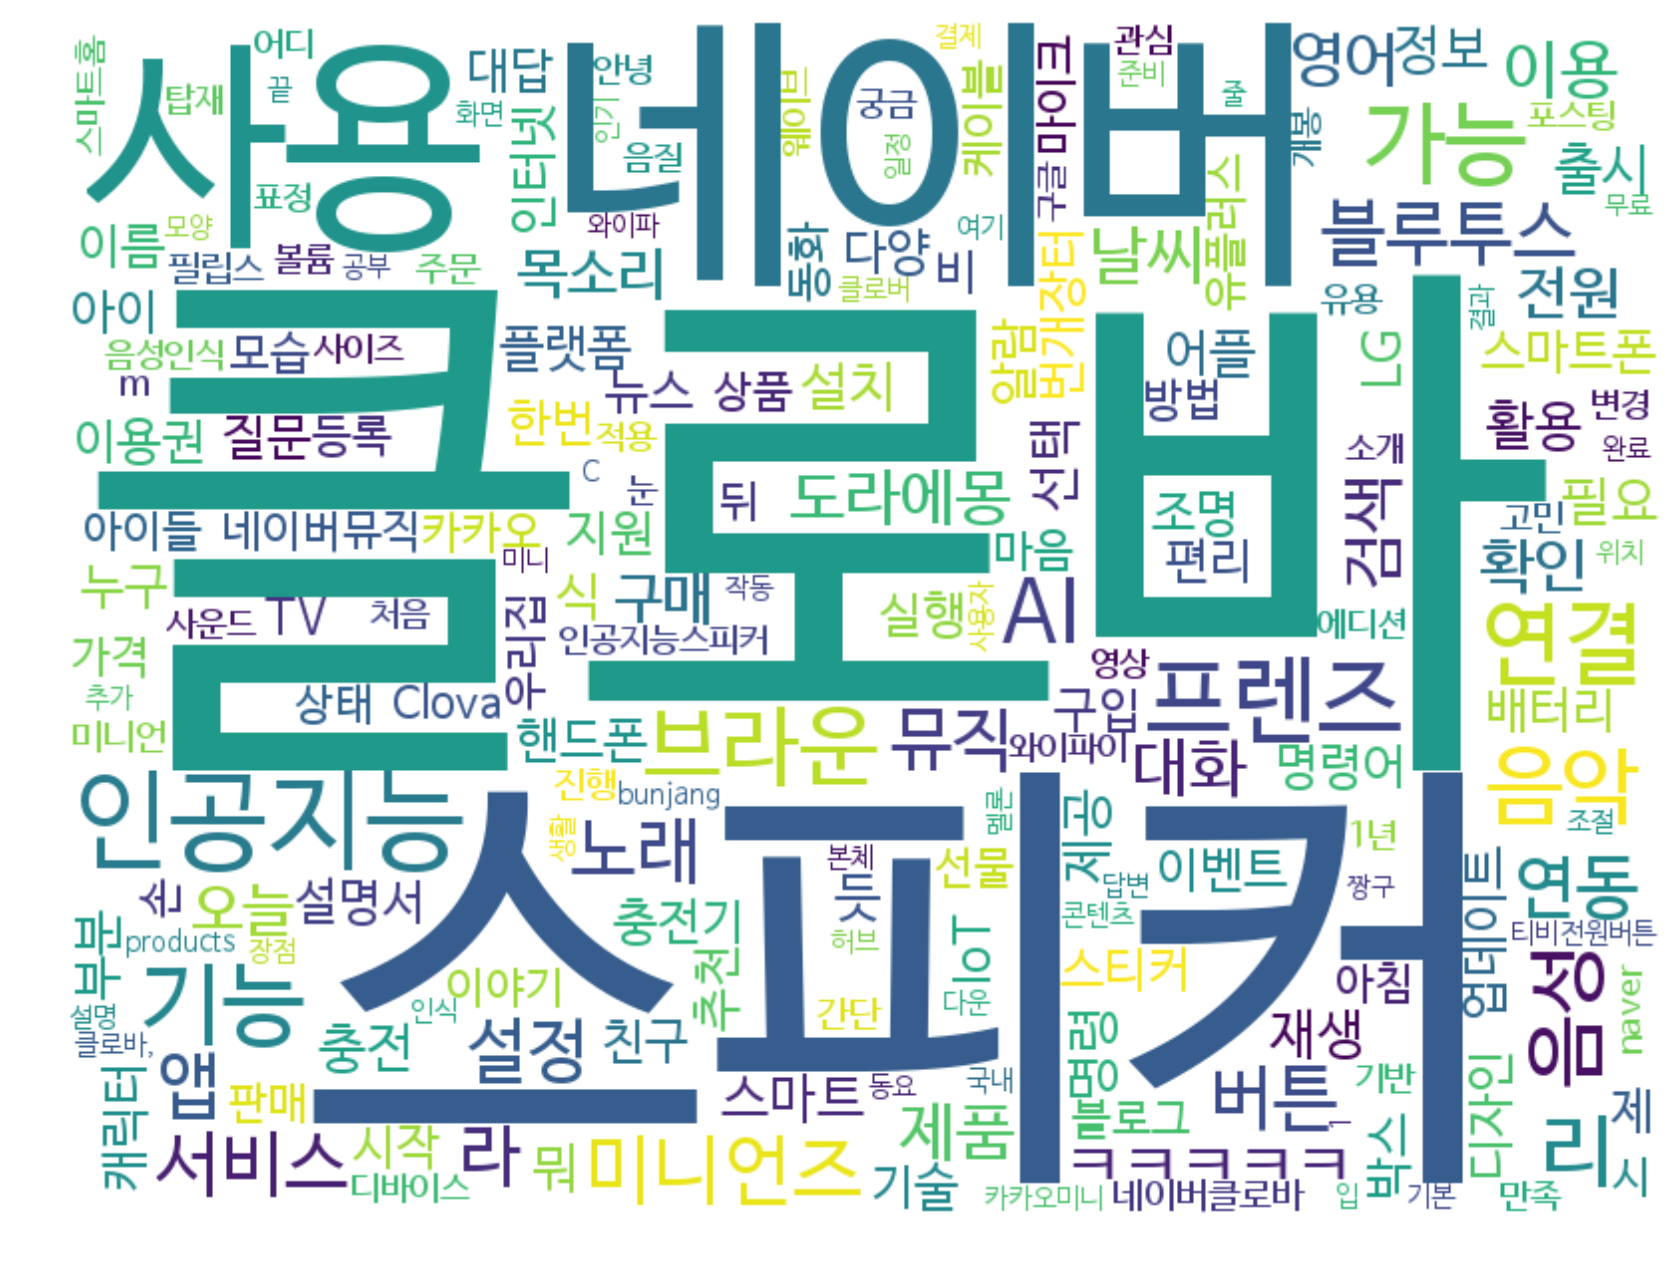

In [210]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

#stopwords = open('./stopwordsKor_hs.txt', 'r', encoding='UTF8')
#lines = stopwords.read().splitlines()
#stopwords.close()

wordcloud = WordCloud(
    font_path = fontpath,
    width = 800,
    height = 600,
    #stopwords = lines,
    background_color="white"
)

wordcloud = wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [211]:
print('[', end="")
for i, (word, value) in enumerate(sorted(wordcloud.words_.items(), key=lambda x:x[1], reverse=True)[:20]):
    if i == 19:
        print("('{}', {:.3f})".format(word, round(value, 3)), end="")
    else:
        print("('{}', {:.3f}),".format(word, round(value, 3)))
print(']', end="")

[('클로바', 1.000),
('스피커', 0.779),
('네이버', 0.768),
('사용', 0.407),
('인공지능', 0.352),
('프렌즈', 0.264),
('가능', 0.242),
('연결', 0.240),
('기능', 0.240),
('브라운', 0.218),
('음악', 0.209),
('AI', 0.208),
('리', 0.191),
('음성', 0.180),
('미니언즈', 0.170),
('노래', 0.150),
('앱', 0.146),
('서비스', 0.143),
('블루투스', 0.140),
('버튼', 0.137)]

```
Komoran
[('클로바', 1.000),
('네이버', 0.718),
('스피커', 0.649),
('사용', 0.338),
('인공지능', 0.305),
('프렌즈', 0.243),
('기능', 0.202),
('연결', 0.202),
('음악', 0.183),
('음성', 0.181),
('AI', 0.179),
('브라운', 0.171),
('뮤직', 0.149),
('미니언즈', 0.140),
('노래', 0.131),
('버튼', 0.130),
('미니', 0.129),
('샐리', 0.128),
('영어', 0.123),
('블루투스', 0.121)]
```

```
twitter
[('네이버', 1.000),
('스피커', 0.917),
('사용', 0.469),
('지능', 0.447),
('인공', 0.441),
('미니', 0.397),
('프렌즈', 0.344),
('기능', 0.295),
('음악', 0.267),
('AI', 0.261),
('브라운', 0.252),
('음성', 0.218),
('뮤직', 0.214),
('노래', 0.199),
('버튼', 0.194),
('앱', 0.185),
('연결', 0.181),
('블루투스', 0.174),
('영어', 0.169),
('서비스', 0.167)]
```

```
Hannanum - '리'는 셀리인듯
[('클로바', 1.000),
('스피커', 0.779),
('네이버', 0.768),
('사용', 0.407),
('인공지능', 0.352),
('프렌즈', 0.264),
('가능', 0.242),
('연결', 0.240),
('기능', 0.240),
('브라운', 0.218),
('음악', 0.209),
('AI', 0.208),
('리', 0.191),
('음성', 0.180),
('미니언즈', 0.170),
('노래', 0.150),
('앱', 0.146),
('서비스', 0.143),
('블루투스', 0.140),
('버튼', 0.137)]
```

In [213]:
hannanum.pos('셀리')

[('세', 'P'), ('ㄹ', 'E'), ('리', 'N')]